In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [12]:
DATA_PATH = "../data"

In [13]:
date_cols = [
    "FIRST_COLLECTION_SCHEDULE_EARLIEST",
    "FIRST_COLLECTION_SCHEDULE_LATEST",
    "LAST_DELIVERY_SCHEDULE_EARLIEST",
    "LAST_DELIVERY_SCHEDULE_LATEST",
]
unlabelled = pd.read_csv(f"{DATA_PATH}/New_bookings_with_predictions.csv", parse_dates=date_cols)
train_predictions = pd.read_csv(f"{DATA_PATH}/train_predictions.csv")
test_predictions = pd.read_csv(f"{DATA_PATH}/test_predictions.csv")

In [14]:
train_stats = train_predictions["proba"].describe().rename("Train")
train_stats

count    2076.000000
mean        0.262201
std         0.218101
min         0.000517
25%         0.090023
50%         0.202962
75%         0.398607
max         0.937421
Name: Train, dtype: float64

In [15]:
test_stats = test_predictions["proba"].describe().rename("Test")
test_stats

count    519.000000
mean       0.267490
std        0.206096
min        0.000517
25%        0.103466
50%        0.223611
75%        0.379723
max        0.933356
Name: Test, dtype: float64

In [16]:
unlabelled_stats = unlabelled["DELAY_PROBABILITY"].describe().rename("Unlabelled")
unlabelled_stats

count    1000.000000
mean        0.322477
std         0.171974
min         0.016109
25%         0.202281
50%         0.281174
75%         0.407227
max         0.917575
Name: Unlabelled, dtype: float64

In [17]:
pred_stats = (pd.concat([train_stats, test_stats, unlabelled_stats], axis=1))
pred_stats

,Train,Test,Unlabelled
count,2076.000000,519.000000,1000.000000
mean,0.262201,0.267490,0.322477
std,0.218101,0.206096,0.171974
min,0.000517,0.000517,0.016109
25%,0.090023,0.103466,0.202281
50%,0.202962,0.223611,0.281174
75%,0.398607,0.379723,0.407227
max,0.937421,0.933356,0.917575


In [18]:
sns.set_theme(style="darkgrid")

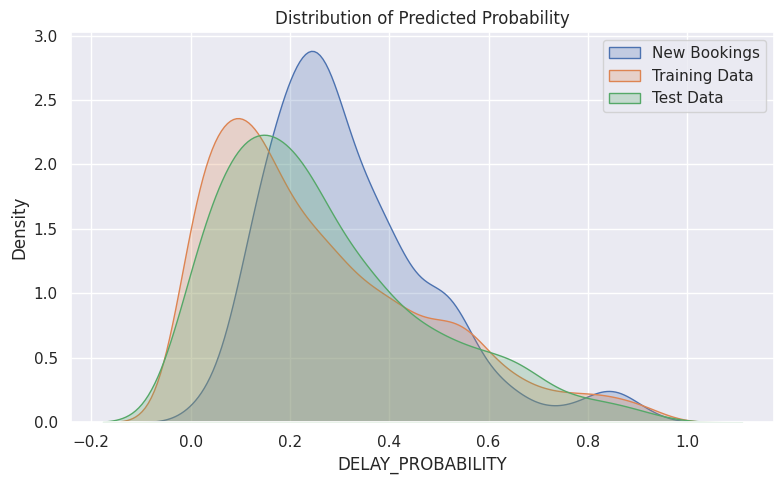

In [19]:
plt.figure(figsize=(8, 5))
sns.kdeplot(unlabelled["DELAY_PROBABILITY"], fill=True)
sns.kdeplot(train_predictions["proba"], fill=True)
sns.kdeplot(test_predictions["proba"], fill=True)
plt.title("Distribution of Predicted Probability")
plt.legend(["New Bookings", "Training Data", "Test Data"])
plt.tight_layout()
plt.show()